#Dataset Information :

        age
        sex
        chest pain type (4 values)
        resting blood pressure
        serum cholestoral in mg/dl
        fasting blood sugar > 120 mg/dl
        resting electrocardiographic results (values 0,1,2)
        maximum heart rate achieved
        exercise induced angina
        oldpeak = ST depression induced by exercise relative to rest
        the slope of the peak exercise ST segment
        number of major vessels (0-3) colored by flourosopy
        thal: 0 = normal; 1 = fixed defect; 2 = reversable defect



In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


#Exploratory Data Analysis:

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
df.shape

(908, 13)

In [ ]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df['exang'].unique()

array(['FALSE', 'TRUE', 'TURE'], dtype=object)

In [ ]:
# replace 'TURE' with 'TRUE'
df['exang'] = df['exang'].replace('TURE','TRUE')

In [ ]:
df['exang'].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [ ]:
df['exang'].value_counts()

,count
exang,
FALSE,535
TRUE,373


In [ ]:
# summary statistics of numerical data
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
# checking for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


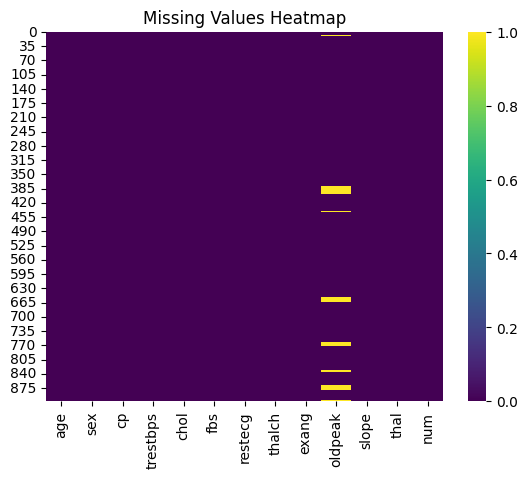

In [ ]:
# Visualize missing values
sns.heatmap(data = df.isnull(), cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
df['oldpeak'].median()

0.5

In [ ]:
# filling missing values with median
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


<Axes: >

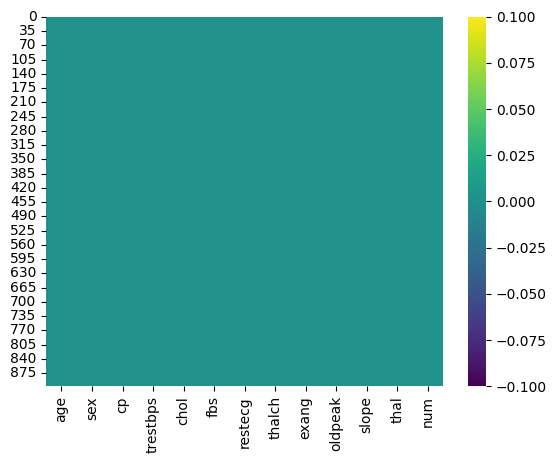

In [ ]:
sns.heatmap(data = df.isnull(), cmap='viridis')

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Catagorical Variables:{categorical_cols}")

Catagorical Variables:['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(f"Numerical Variable:{numerical_cols}")

Numerical Variable:['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']


In [ ]:
df.duplicated().sum()

0

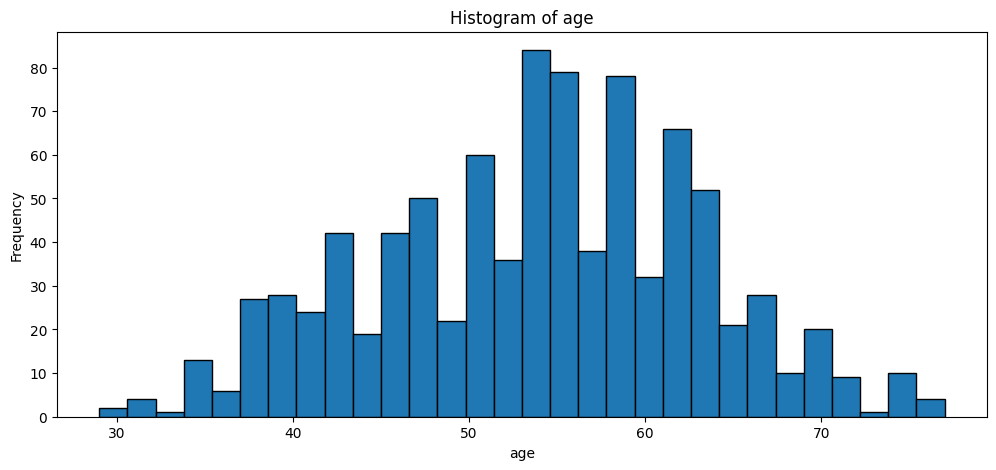

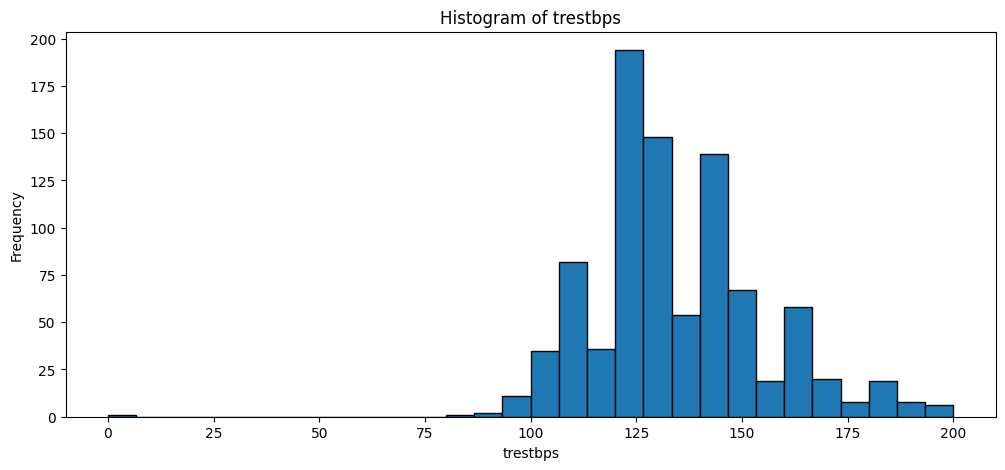

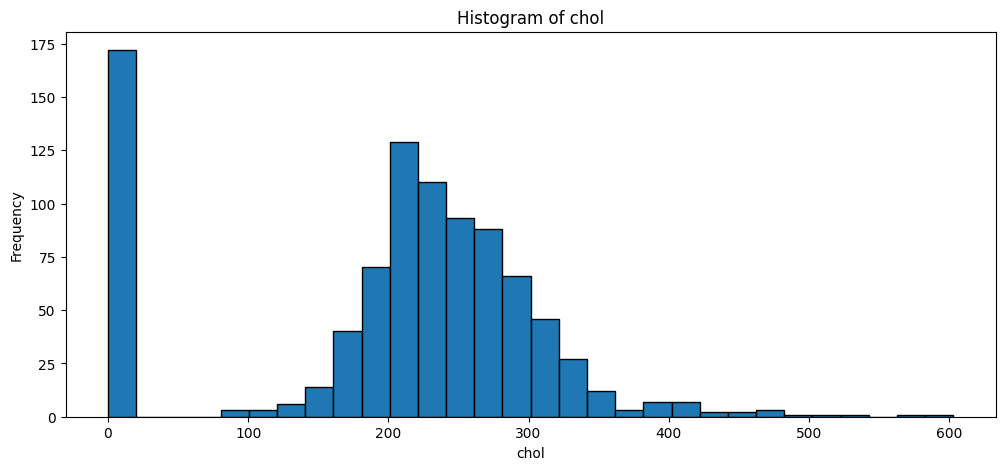

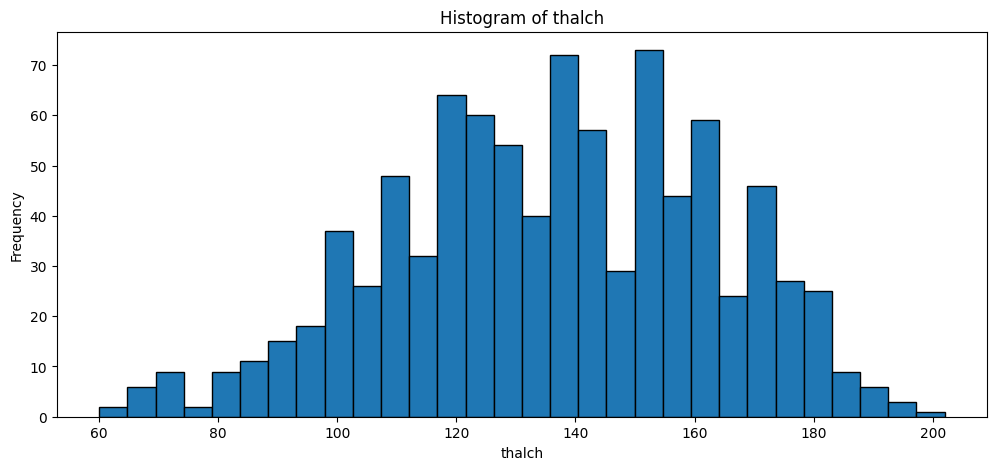

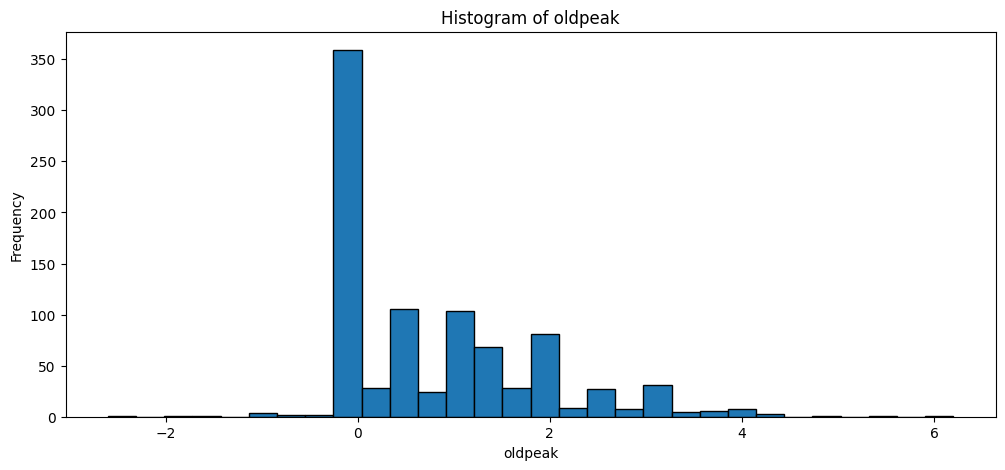

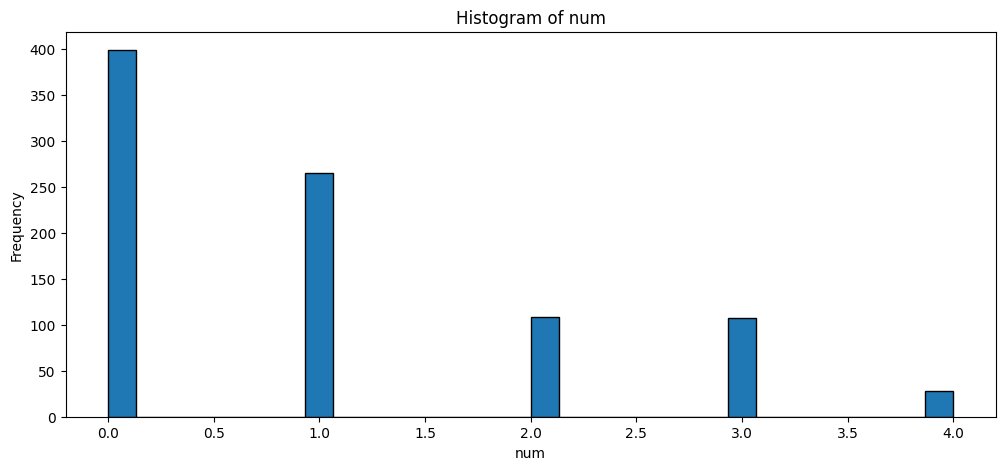

In [ ]:
# histogram for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

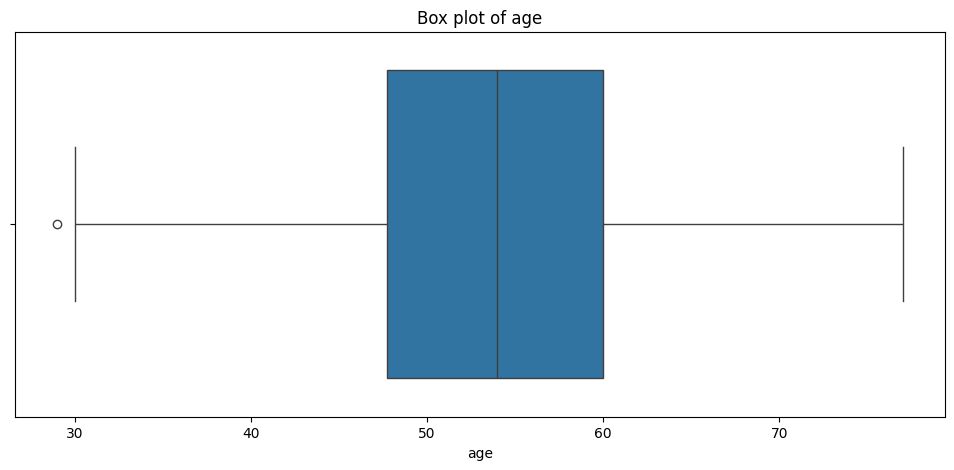

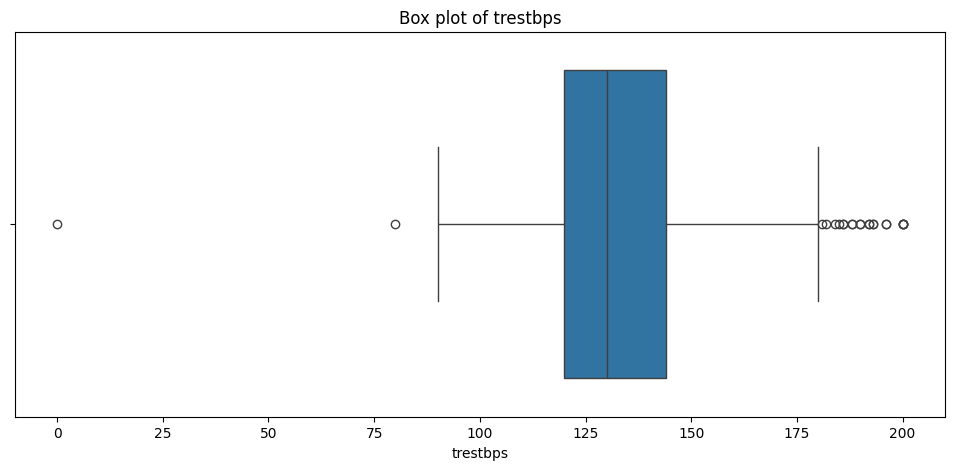

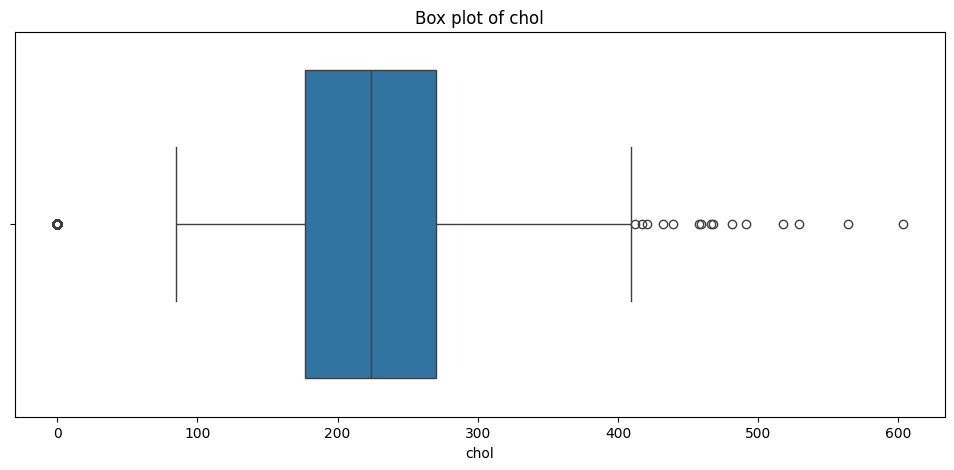

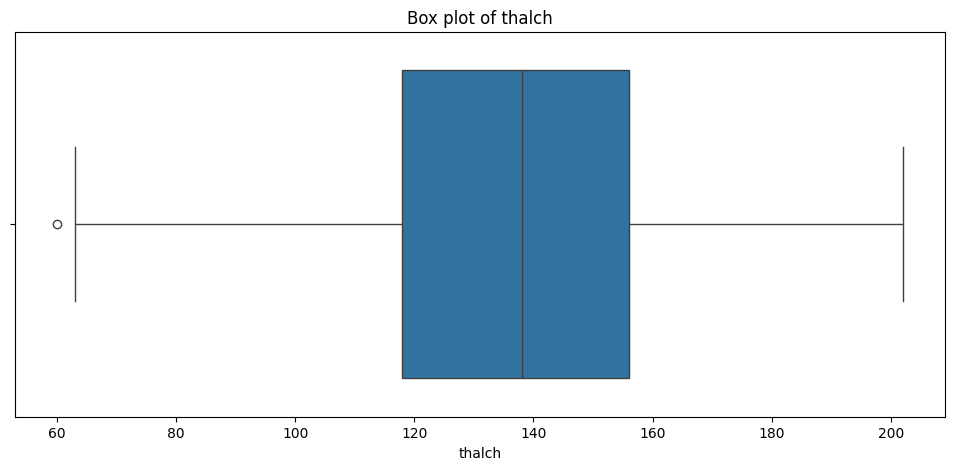

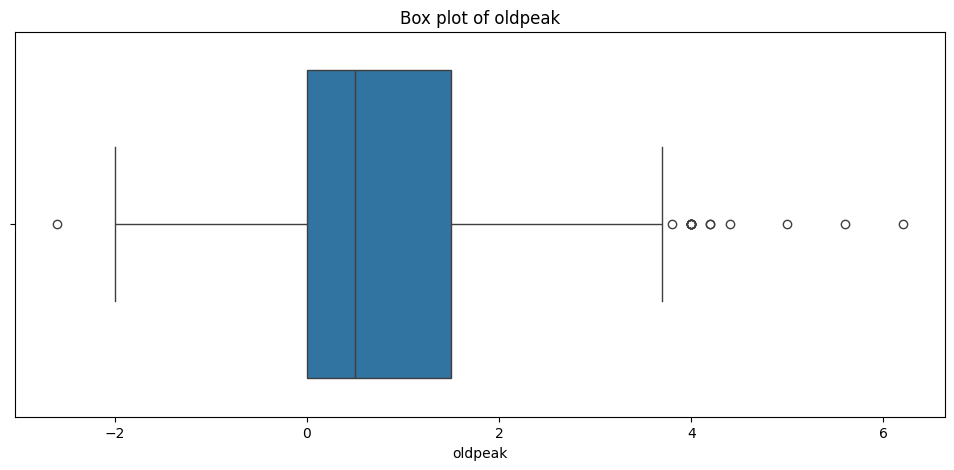

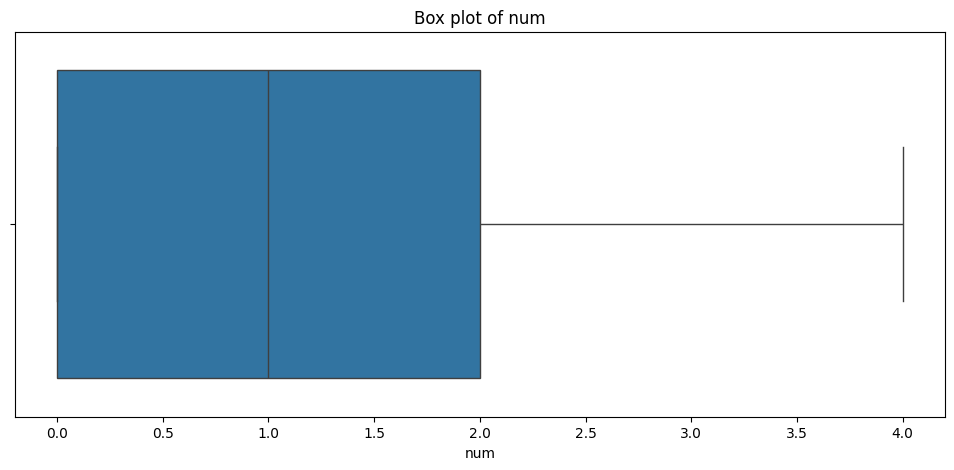

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f'Box plot of {col}')
    plt.show()

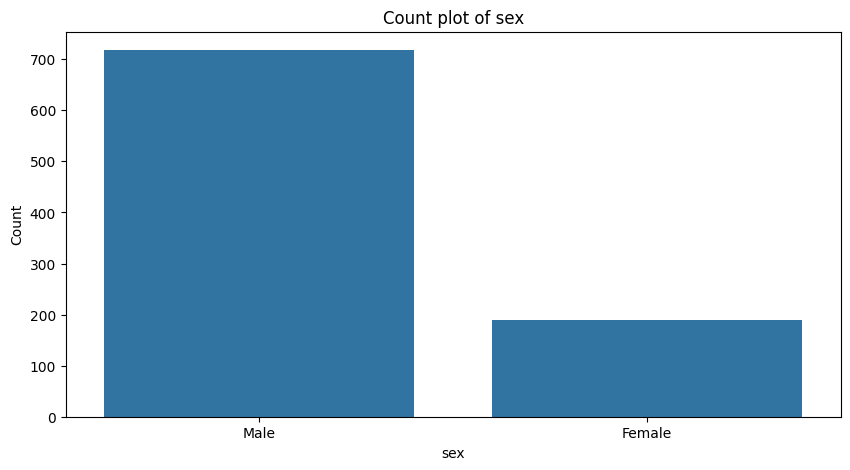

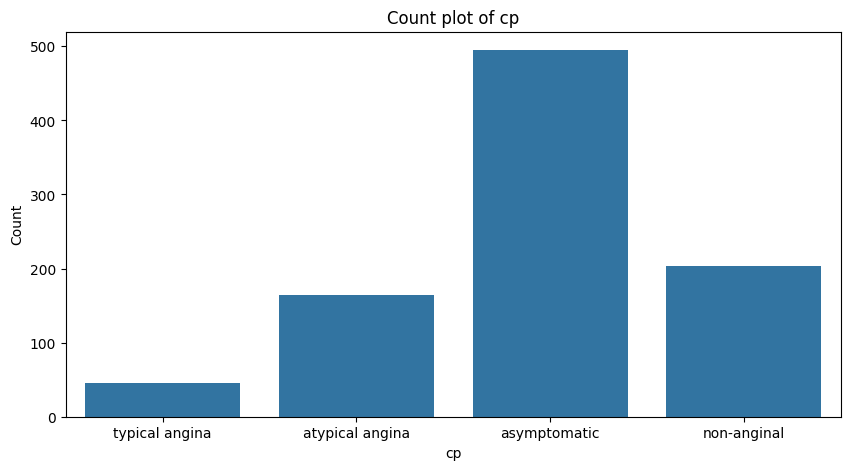

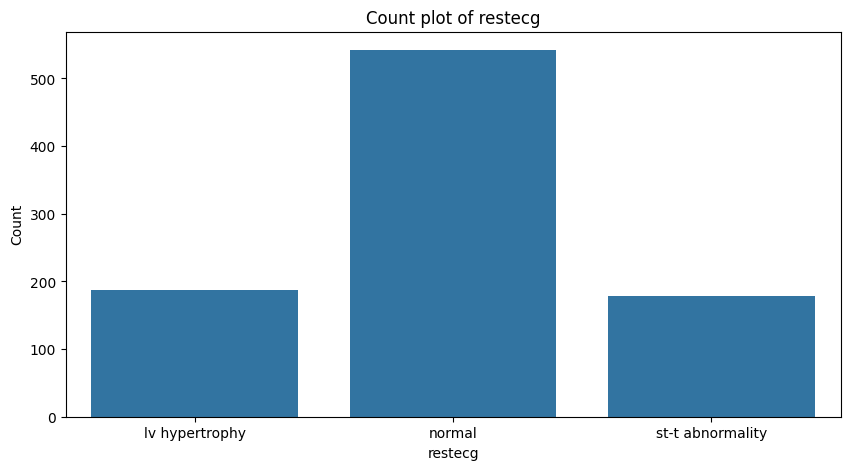

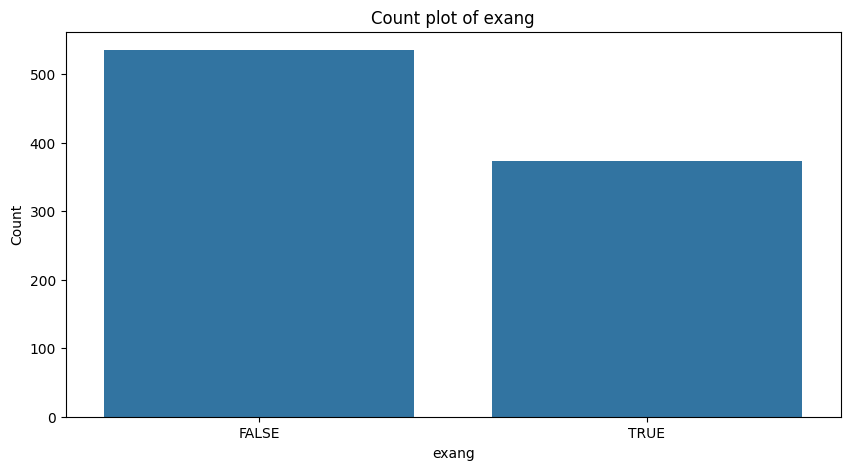

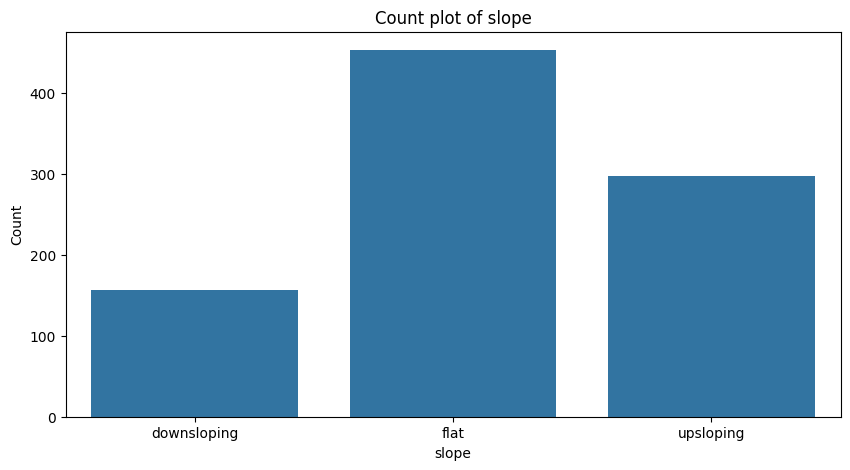

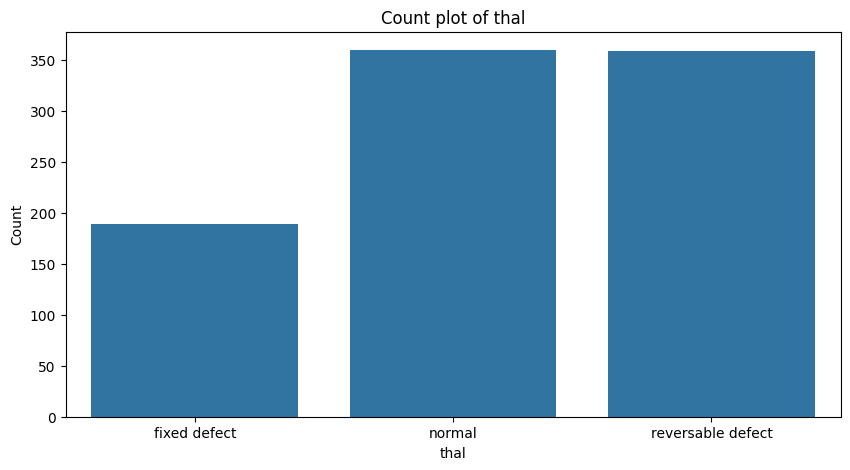

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count plot of {col}')
    plt.show()

                 Count       %
cp                            
asymptomatic       495  54.52%
non-anginal        203  22.36%
atypical angina    165  18.17%
typical angina      45   4.96%


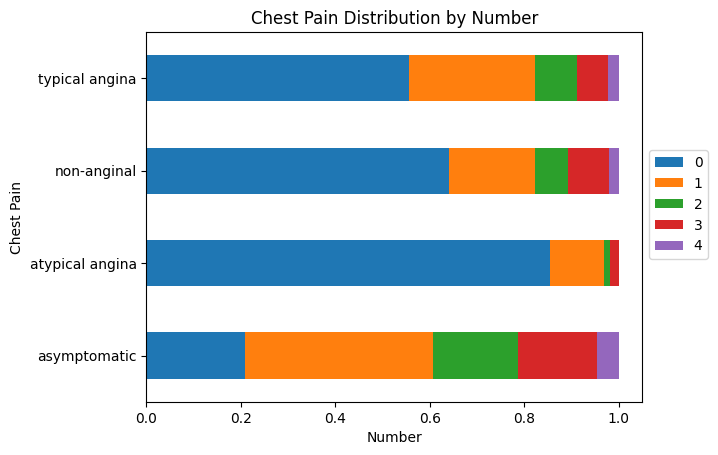

In [ ]:
cp_col = df['cp']
counts = cp_col.value_counts()
percentage = cp_col.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
tab = pd.DataFrame({"Count": counts, "%": percentage})
print(tab)

# Visualize chest pain distribution by Number
cp_group = df.groupby(['cp', 'num']).size().unstack()
cp_group.apply(lambda x: x / x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Chest Pain')
plt.xlabel('Number')
plt.title("Chest Pain Distribution by Number")
plt.show()

        Count       %
sex                  
Male      718  79.07%
Female    190  20.93%


Text(0.5, 1.0, 'Gender distribution')

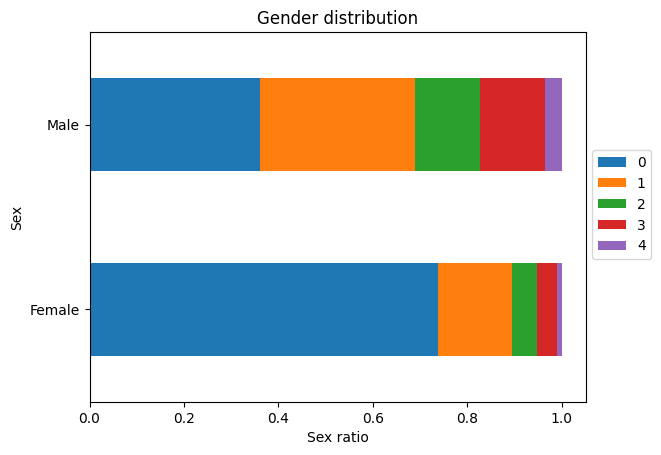

In [ ]:
sex_col=df['sex']
counts=sex_col.value_counts()
percentage= sex_col.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution
gender_group = df.groupby(['sex', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend( bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Sex')
plt.xlabel('Sex ratio')
plt.title("Gender distribution")

                   Count       %
thal                            
normal               360  39.65%
reversable defect    359  39.54%
fixed defect         189  20.81%


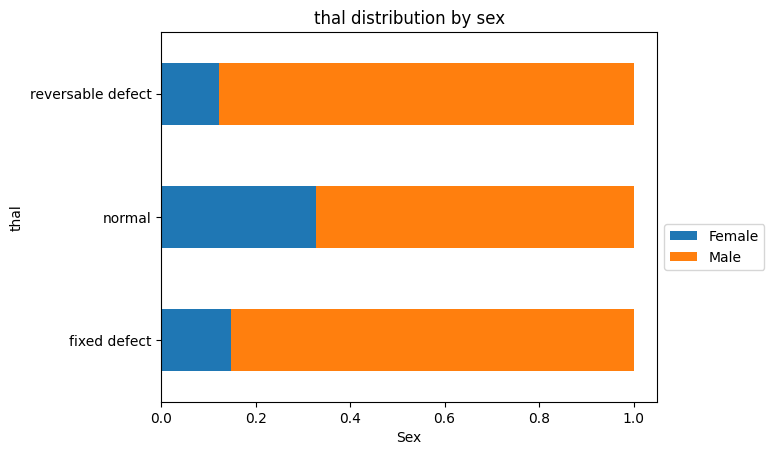

In [ ]:
thal_col = df['thal']
counts = thal_col.value_counts()
percentage = thal_col.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
tab = pd.DataFrame({"Count": counts, "%": percentage})
print(tab)

# maximum heart rate achieved
thalch_group = df.groupby(['thal','sex']).size().unstack()
thalch_group.apply(lambda x:x/x.sum(), axis = 1).plot(kind = 'barh',stacked = True,legend = False)
plt.legend(bbox_to_anchor =(1.0,0.5))
plt.ylabel('thal')
plt.xlabel('Sex')
plt.title('thal distribution by sex')
plt.show()

#Feature Engineering:

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
  df['sex'] = label_encoder.fit_transform(df['sex'])
  df['cp'] = label_encoder.fit_transform(df['cp'])
  df['restecg'] = label_encoder.fit_transform(df['restecg'])
  df['exang'] = label_encoder.fit_transform(df['exang'])
  df['slope'] = label_encoder.fit_transform(df['slope'])
  df['thal'] = label_encoder.fit_transform(df['thal'])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


In [ ]:
df['exang'].value_counts()

,count
exang,
0,535
1,373


In [ ]:
from sklearn.ensemble import IsolationForest

# fit isolation forest to identify outliers
iso_forest = IsolationForest(contamination = 0.05, random_state = 42)
outliers = iso_forest.fit_predict(df[numerical_cols])
outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
df['outlier'] = outliers
df['outlier'].value_counts()
# -1 indicates an outlier and 1 indicates an inliner

,count
outlier,
1,862
-1,46


In [ ]:
outliers_df = df[df['outlier'] == 1]
outliers_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,outlier
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0,1
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0,1
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0,1
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0,1
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0,1


In [ ]:
df_cleaned_outliers = df[df['outlier'] == 1]
df_cleaned_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,outlier
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0,1
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0,1
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0,1
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0,1
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,55,1,0,160,289,False,0,145,1,0.8,1,2,4,1
895,55,1,0,120,0,False,2,92,0,0.3,2,2,4,1
903,53,1,0,125,0,False,1,120,0,1.5,2,2,4,1
906,56,1,2,144,208,True,2,105,1,0.5,0,2,4,1


In [ ]:
df_cleaned =df_cleaned_outliers.drop(columns = ['outlier'])
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,55,1,0,160,289,False,0,145,1,0.8,1,2,4
895,55,1,0,120,0,False,2,92,0,0.3,2,2,4
903,53,1,0,125,0,False,1,120,0,1.5,2,2,4
906,56,1,2,144,208,True,2,105,1,0.5,0,2,4


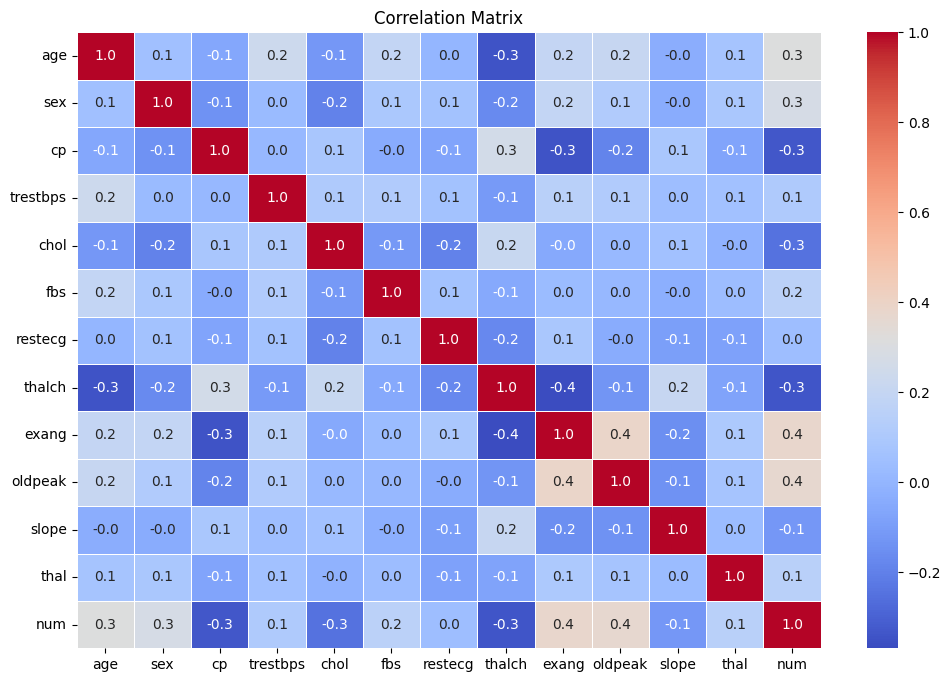

In [ ]:
# coorelation matrix
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = '.1f')
plt.title('Correlation Matrix')
plt.show()

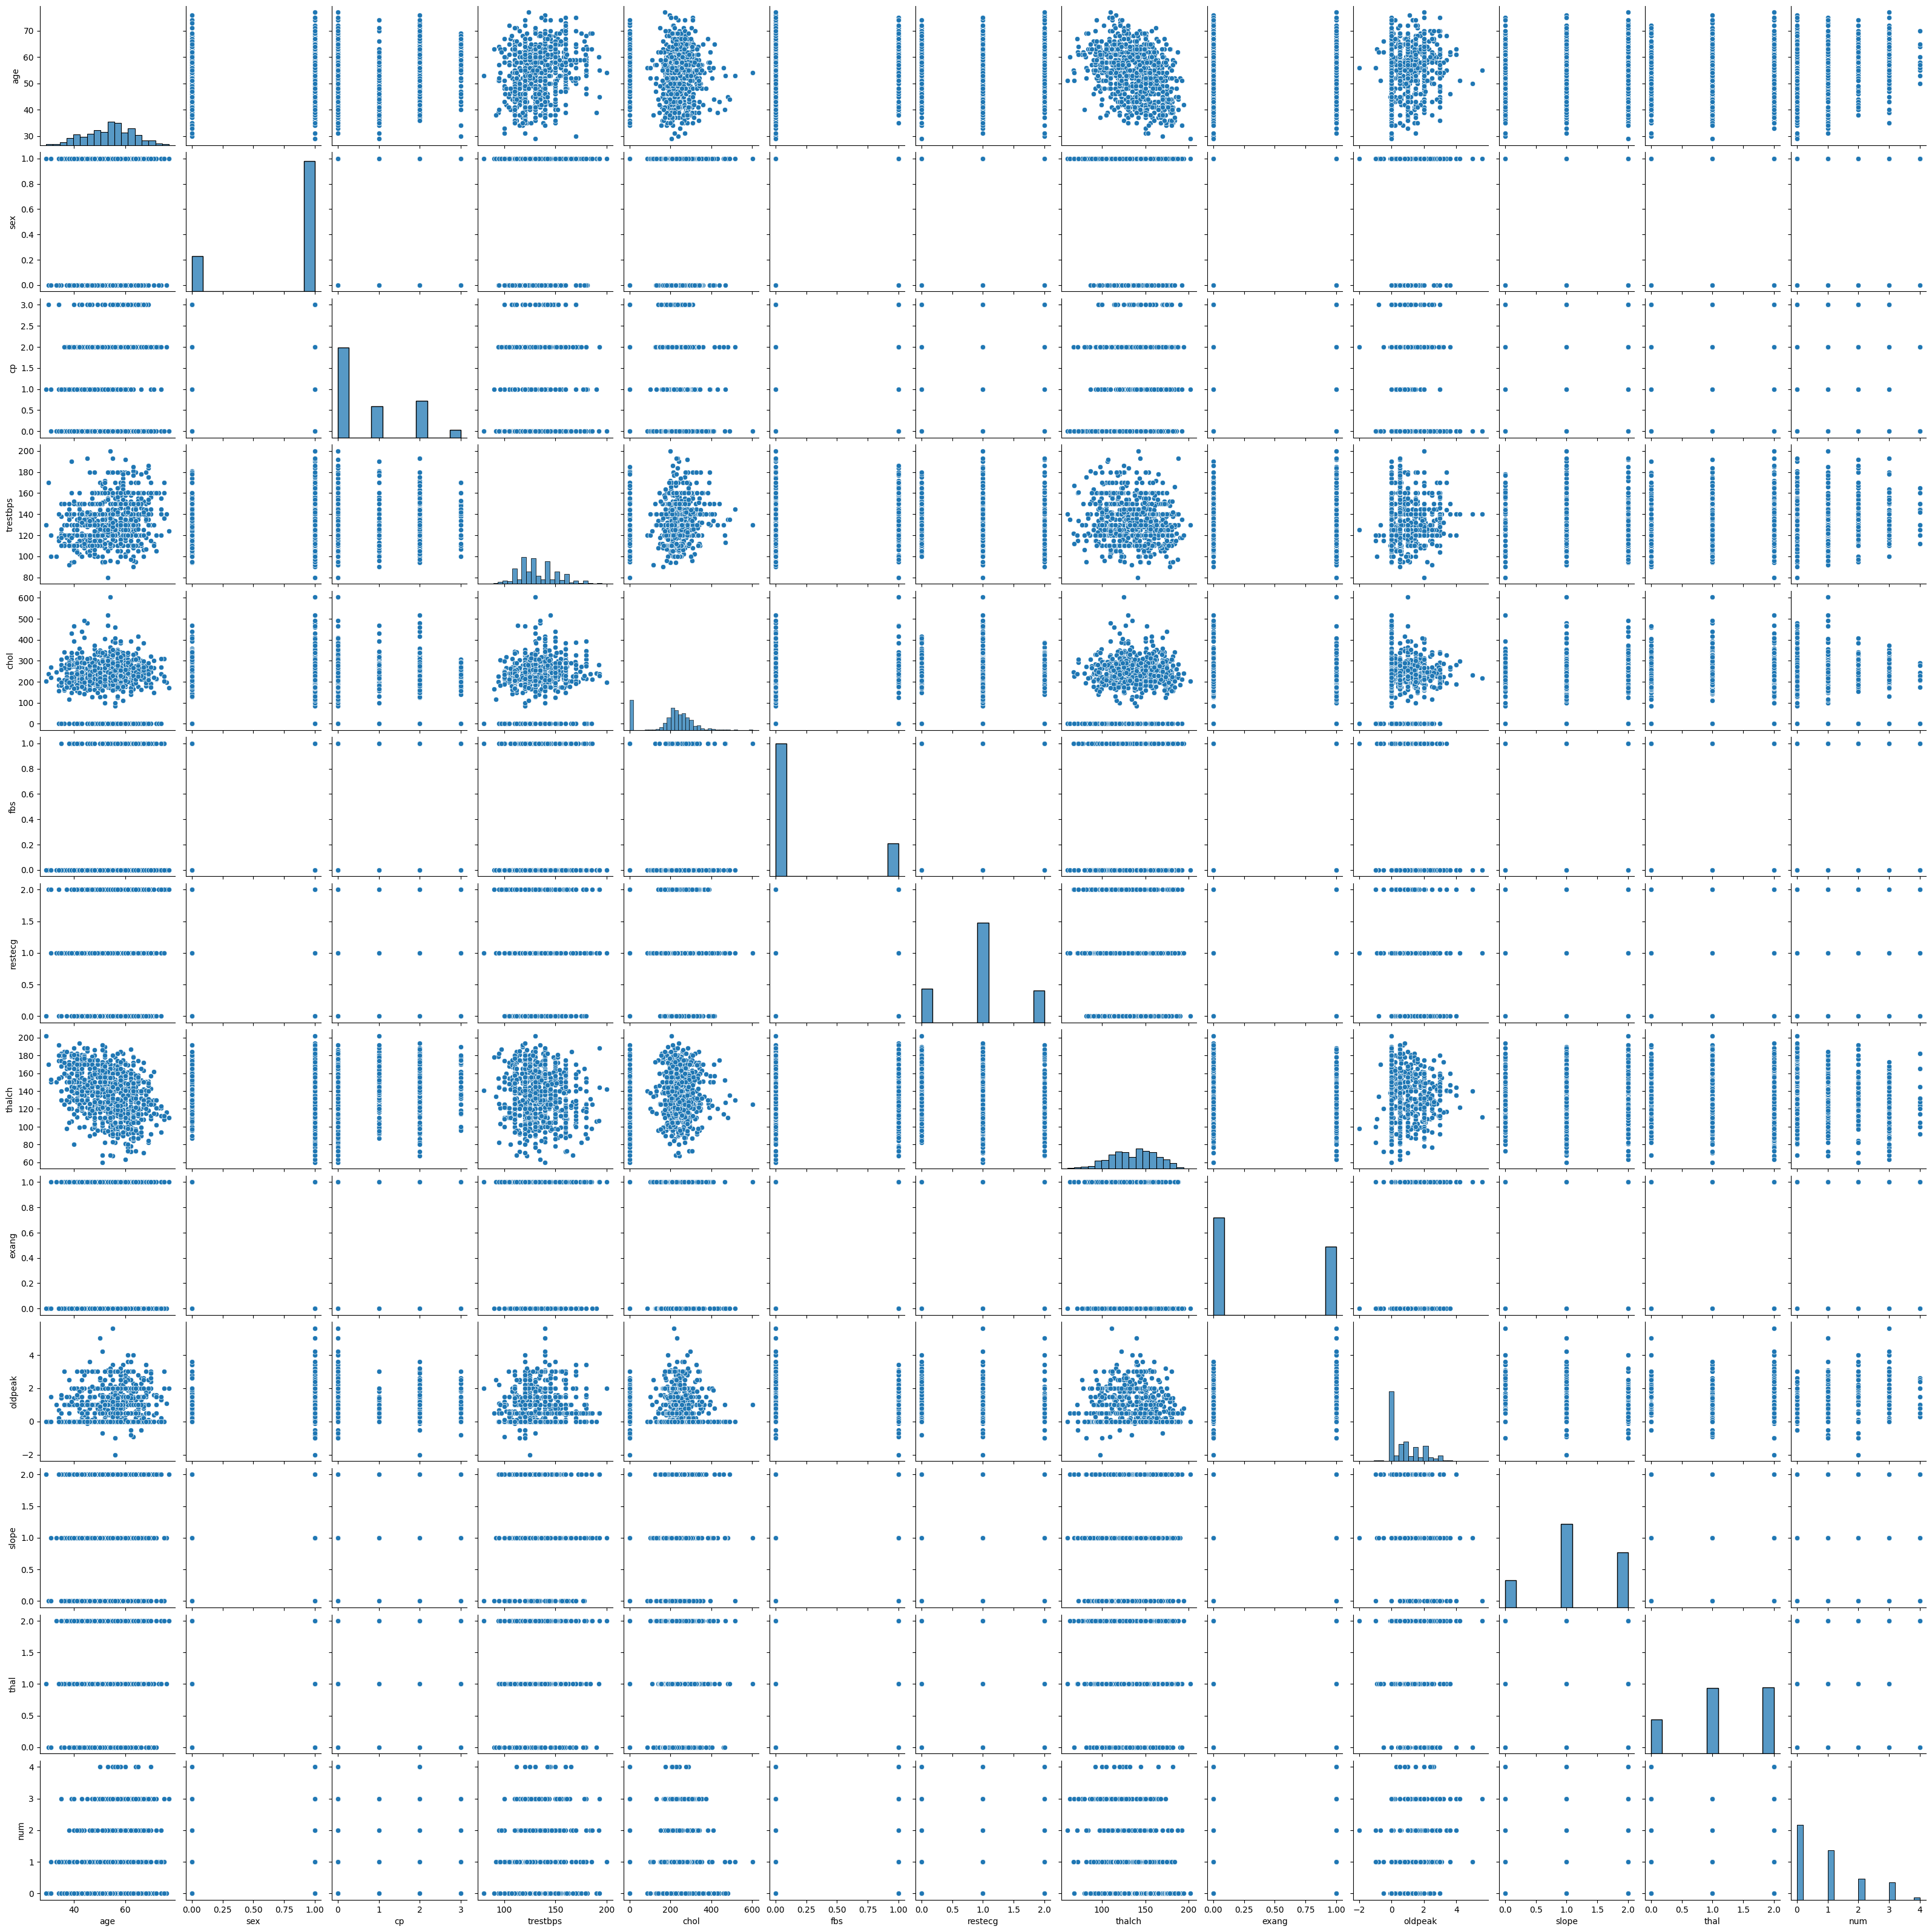

In [ ]:
sns.pairplot(df_cleaned)

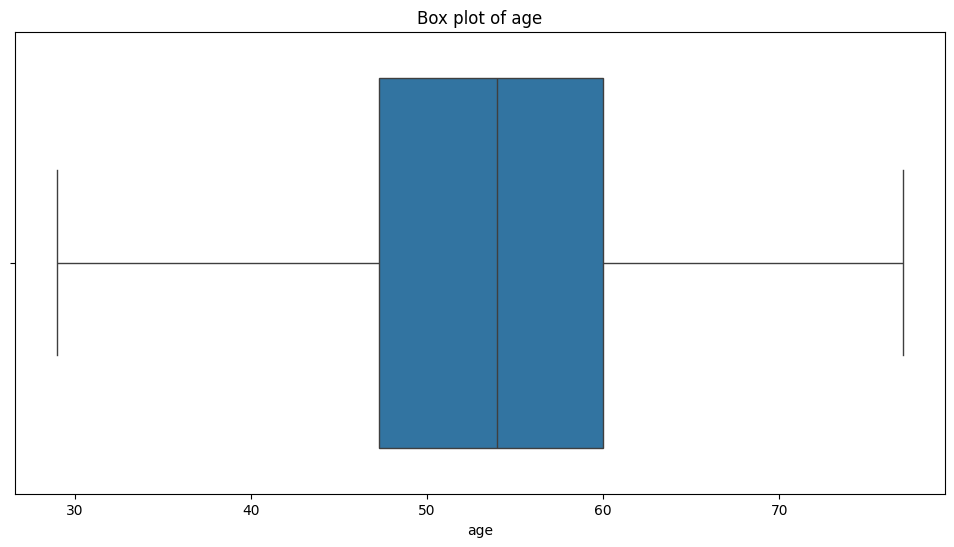

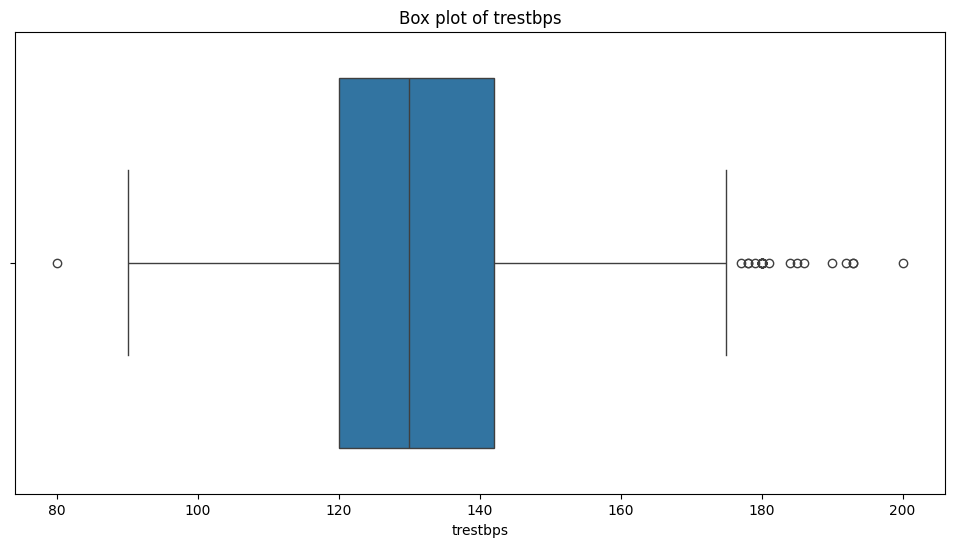

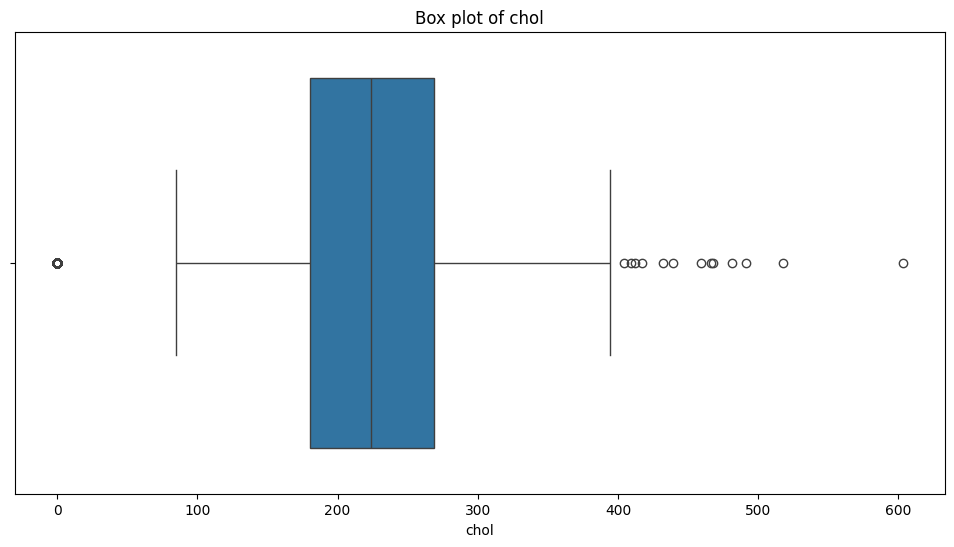

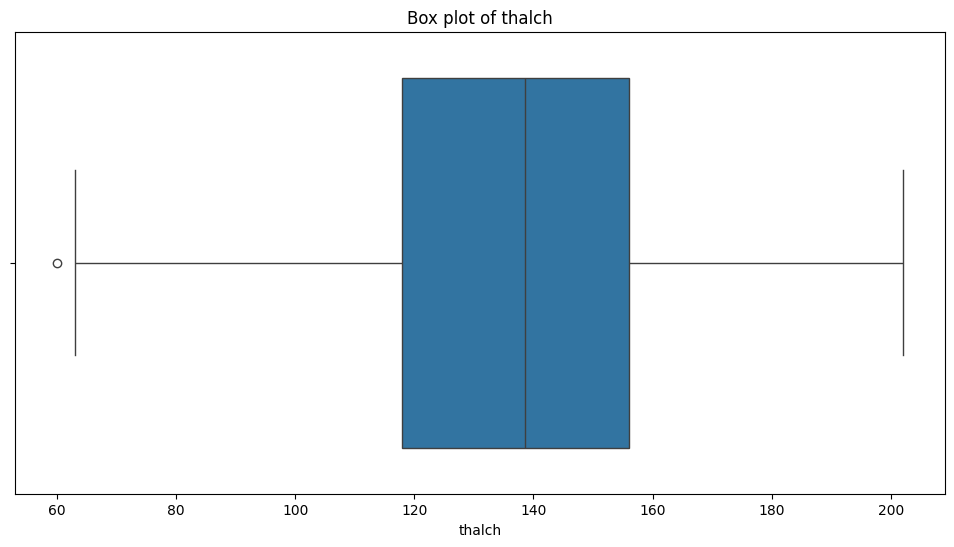

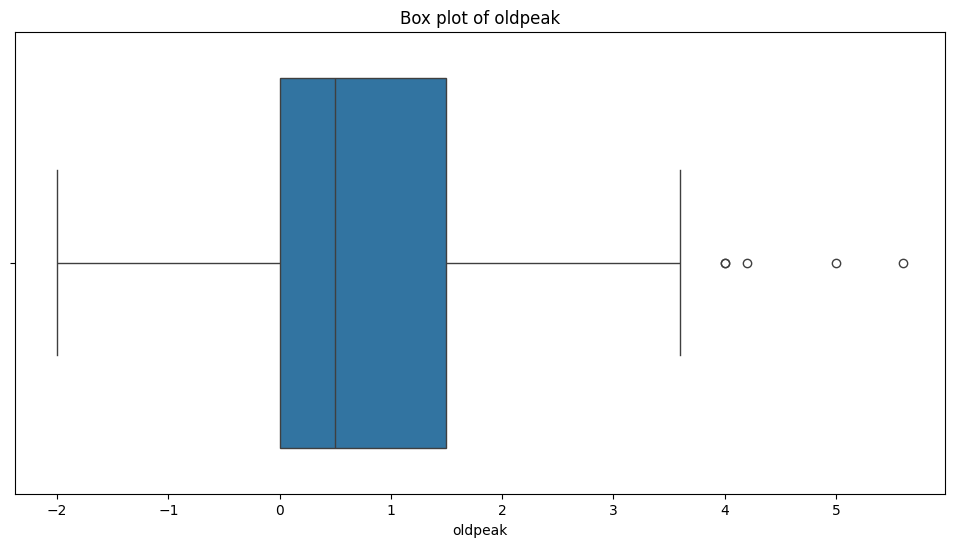

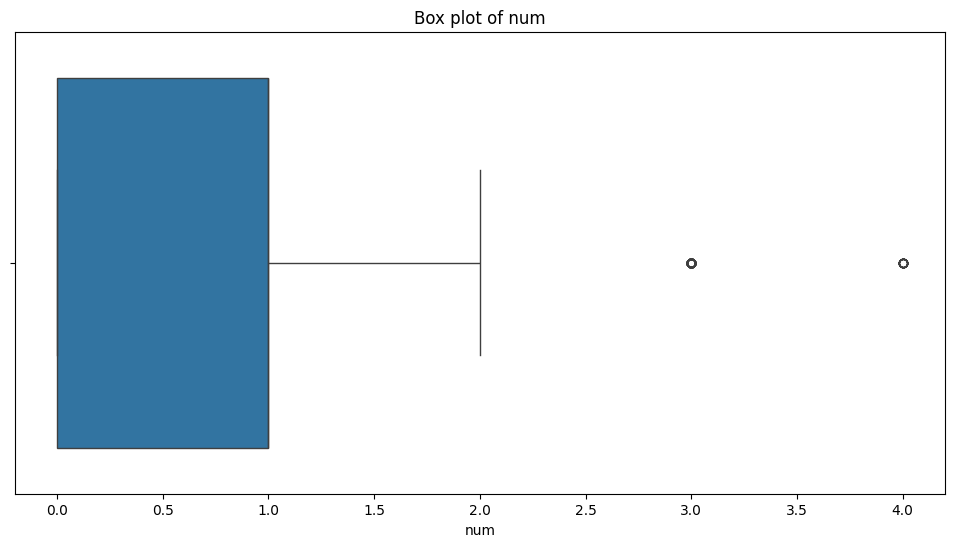

In [ ]:
# boxplot for cleaned data
for col in numerical_cols:
  plt.figure(figsize=(12,6))
  sns.boxplot(x=df_cleaned[col])
  plt.xlabel(col)
  plt.title(f'Box plot of {col}')
  plt.show()

In [ ]:
# apply standard scaler(standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scaler = scaler.fit_transform(df_cleaned)
std_scaler

array([[ 1.04448633,  0.51914737,  2.3453943 , ..., -1.71419997,
        -1.58116619, -0.8741361 ],
       [-1.41181808,  0.51914737,  0.23942567, ..., -0.24973974,
        -1.58116619, -0.8741361 ],
       [ 0.37458513,  0.51914737, -0.81355865, ..., -0.24973974,
        -1.58116619, -0.8741361 ],
       ...,
       [-0.07201567,  0.51914737, -0.81355865, ...,  1.21472049,
         1.07309916,  2.87931506],
       [ 0.26293493,  0.51914737,  1.29240999, ..., -1.71419997,
         1.07309916,  2.87931506],
       [ 0.37458513,  0.51914737, -0.81355865, ..., -0.24973974,
         1.07309916,  2.87931506]])

In [ ]:
df_scaled = pd.DataFrame(std_scaler, columns=df_cleaned.columns)
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.044486,0.519147,2.345394,0.662546,0.284090,2.002905,-1.569447,0.519995,-0.834776,1.525404,-1.71420,-1.581166,-0.874136
1,-1.411818,0.519147,0.239426,0.124520,0.008566,-0.499275,0.018421,-0.171371,-0.834776,-0.835644,-0.24974,-1.581166,-0.874136
2,0.374585,0.519147,-0.813559,0.393533,-0.092459,-0.499275,0.018421,0.443177,-0.834776,-0.425027,-0.24974,-1.581166,-0.874136
3,-0.183666,0.519147,2.345394,-0.790124,-0.147564,-0.499275,-1.569447,2.056364,-0.834776,-0.835644,-0.24974,-1.581166,-0.874136
4,0.374585,0.519147,-0.813559,-1.220545,-0.009802,-0.499275,0.018421,-0.401826,1.197927,0.704170,-0.24974,-1.581166,-0.874136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.151285,0.519147,-0.813559,1.469584,0.798402,-0.499275,-1.569447,0.327949,1.197927,-0.014410,-0.24974,1.073099,2.879315
858,0.151285,0.519147,-0.813559,-0.682519,-1.855814,-0.499275,1.606288,-1.707740,-0.834776,-0.527681,1.21472,1.073099,2.879315
859,-0.072016,0.519147,-0.813559,-0.413506,-1.855814,-0.499275,0.018421,-0.632282,-0.834776,0.704170,1.21472,1.073099,2.879315
860,0.262935,0.519147,1.292410,0.608743,0.054487,2.002905,1.606288,-1.208420,1.197927,-0.322372,-1.71420,1.073099,2.879315


In [ ]:
# apply minmax scaler(normalization)
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax_sclaer = minmax.fit_transform(df_cleaned)
minmax_sclaer

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.5       , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.5625    , 1.        , 0.66666667, ..., 0.        , 1.        ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 1.        ,
        1.        ]])

In [ ]:
df_minmax = pd.DataFrame(minmax_sclaer, columns=df_cleaned.columns)
df_minmax

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1.0,1.000000,0.541667,0.386401,1.0,0.0,0.633803,0.0,0.565789,0.0,0.0,0.0
1,0.250000,1.0,0.333333,0.458333,0.336650,0.0,0.5,0.507042,0.0,0.263158,0.5,0.0,0.0
2,0.583333,1.0,0.000000,0.500000,0.318408,0.0,0.5,0.619718,0.0,0.315789,0.5,0.0,0.0
3,0.479167,1.0,1.000000,0.316667,0.308458,0.0,0.0,0.915493,0.0,0.263158,0.5,0.0,0.0
4,0.583333,1.0,0.000000,0.250000,0.333333,0.0,0.5,0.464789,1.0,0.460526,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.541667,1.0,0.000000,0.666667,0.479270,0.0,0.0,0.598592,1.0,0.368421,0.5,1.0,1.0
858,0.541667,1.0,0.000000,0.333333,0.000000,0.0,1.0,0.225352,0.0,0.302632,1.0,1.0,1.0
859,0.500000,1.0,0.000000,0.375000,0.000000,0.0,0.5,0.422535,0.0,0.460526,1.0,1.0,1.0
860,0.562500,1.0,0.666667,0.533333,0.344942,1.0,1.0,0.316901,1.0,0.328947,0.0,1.0,1.0


In [ ]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


#Decision Tree Classification:

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

target_column = 'num'

# split the data into X and y feature
X = df_cleaned.drop(['num'], axis =1)
y = df_cleaned['num']

# split the data into training and testing (using 80-20 splits)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
196,44,1,1,120,184,False,1,142,0,1.0,1,1
158,59,1,0,135,234,False,1,161,0,0.5,1,2
324,55,1,0,150,160,False,2,150,0,0.0,2,2
102,60,0,3,150,240,False,1,171,0,0.9,2,1
374,61,1,0,125,292,False,2,115,1,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72,47,1,2,138,257,False,0,156,0,0.0,2,1
107,46,0,1,105,204,False,1,172,0,0.0,2,1
275,39,1,0,110,273,False,1,132,0,0.0,0,2
444,55,1,0,120,226,False,0,127,1,1.7,0,2


In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
730,74,1,0,155,310,False,1,112,1,1.5,0,1
619,53,1,0,126,0,False,1,106,0,0.0,0,2
121,39,0,2,94,199,False,1,179,0,0.0,2,1
212,53,0,1,140,216,False,1,142,1,2.0,1,2
387,45,1,2,193,236,False,1,188,1,0.5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
240,59,1,2,180,213,False,1,100,0,0.0,2,1
338,49,0,1,110,200,False,1,160,0,0.0,0,0
219,66,1,2,120,0,False,2,120,0,-0.5,2,0
818,58,1,0,128,259,False,0,130,1,3.0,1,2


In [ ]:
y_train

,num
196,0
158,0
324,0
102,0
374,0
...,...
72,0
107,0
275,0
444,1


In [ ]:
y_test

,num
730,2
619,1
121,0
212,0
387,0
...,...
240,0
338,0
219,0
818,3


In [ ]:
# Implement a Decision Tree Classification model using a library like scikit-learn.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
# train the model
dtc = model.fit(X_train, y_train)
dtc

DecisionTreeClassifier()

In [ ]:
# test the model
y_pred = model.predict(X_test)
y_pred

array([4, 0, 0, 1, 0, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 2,
       3, 3, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 3, 3, 0, 2, 0,
       0, 0, 0, 3, 2, 0, 4, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3,
       0, 0, 1, 4, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 3, 0, 1, 2, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 3, 2, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 4, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
# Model Evaluation:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Accuaracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5549132947976878


In [ ]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[65 12  0  3  1]
 [14 21  6  4  1]
 [ 5 11  4  3  1]
 [ 4  4  4  5  0]
 [ 1  2  0  1  1]]


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        81
           1       0.42      0.46      0.44        46
           2       0.29      0.17      0.21        24
           3       0.31      0.29      0.30        17
           4       0.25      0.20      0.22         5

    accuracy                           0.55       173
   macro avg       0.40      0.38      0.39       173
weighted avg       0.53      0.55      0.54       173



In [ ]:
# Access the feature importances
feature_importances = dtc.feature_importances_
feature_importances

array([0.14654594, 0.02021067, 0.13385289, 0.14739377, 0.09585476,
       0.02208837, 0.04009908, 0.15793485, 0.04079677, 0.10161324,
       0.04092919, 0.05268045])

In [ ]:
# create dataframe of dtc(model df)
dtc_df = pd.DataFrame({'Feature':X_train.columns, 'Importance': feature_importances})
# sort the Dataframe by importance
dtc_df = dtc_df.sort_values(by = 'Importance', ascending=False)
dtc_df

,Feature,Importance
7,thalch,0.157935
3,trestbps,0.147394
0,age,0.146546
2,cp,0.133853
9,oldpeak,0.101613
4,chol,0.095855
11,thal,0.052680
10,slope,0.040929
8,exang,0.040797
6,restecg,0.040099


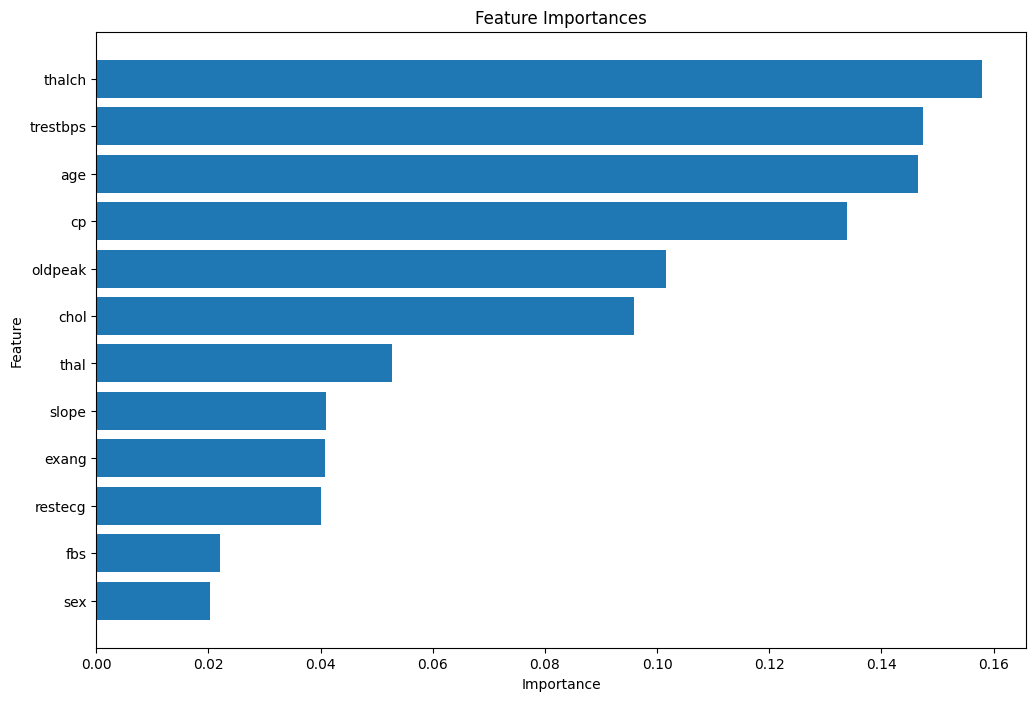

In [ ]:
#  Visualize Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(dtc_df['Feature'], dtc_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest importance at the top
plt.show()


#Hyperparameter Tuning:
Improve the performance of the model.

Hyperparameters Tuning refers to the process of choosing the optimum set of hyperparameters for a machine learning model.This process is also called as hyperparameters optimization.


This can be considered as External Parameters, where as model parameter is considered as Internal Parameters.


In [ ]:
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(['num'], axis =1)
y = df_cleaned['num']

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy={1: 273, 2: 273, 3: 273})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#SMOTE->Synthetic Minority Over-sampling Technique (SMOTE).IT balance an imbalance dataset


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# define the parameters
param_grid = {
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10, 20],
    'criterion' : ['gini', 'entropy']
}

# define the model
gscv = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 5)
# fit & train the model
gscv.fit(X_train_resampled,y_train_resampled)
best_params = gscv.best_params_
best_model = gscv.best_estimator_

print(f'Best Parameters: {best_params}')


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}


#Model Evaluation and Analysis:

In [ ]:
# test the model
y_pred_gscv = best_model.predict(X_test)
y_pred_gscv

array([0, 0, 0, 3, 3, 2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 3, 3, 2, 0, 0, 2, 2,
       3, 2, 3, 1, 1, 1, 3, 1, 1, 0, 3, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 2, 3, 0, 1, 3, 1, 1, 1, 1, 0, 3, 0, 3, 3, 0, 0, 1,
       2, 0, 1, 3, 1, 0, 0, 0, 2, 1, 3, 2, 1, 1, 1, 0, 3, 0, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 1, 2, 1, 4, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 0, 3, 3,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 0, 2, 0, 3, 2, 3, 3, 3, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 1, 2, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 2, 1, 1])

In [ ]:
# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gscv))

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gscv))

Confusion Matrix:
[[54 16  4  7  0]
 [ 6 16 10 13  1]
 [ 2 14  6  2  0]
 [ 2  6  6  3  0]
 [ 0  1  0  3  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        81
           1       0.30      0.35      0.32        46
           2       0.23      0.25      0.24        24
           3       0.11      0.18      0.13        17
           4       0.50      0.20      0.29         5

    accuracy                           0.46       173
   macro avg       0.40      0.33      0.35       173
weighted avg       0.53      0.46      0.49       173



In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV

# define the parameters
param_grid = {
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10, 20],
    'criterion' : ['gini', 'entropy']
}

# define the model
rscv = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 5)

# fit & train the model
rscv.fit(X_train_resampled,y_train_resampled)
best_params = rscv.best_params_
best_model = rscv.best_estimator_

print(f'Best Model: {best_model}')

# test the model
y_pred_rscv = best_model.predict(X_test)
y_pred_rscv
'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# define the parameters\nparam_grid = {\n    'max_depth' : [None, 10, 20, 30, 40, 50],\n    'min_samples_split' : [2, 5, 10, 20],\n    'criterion' : ['gini', 'entropy']\n}\n\n# define the model\nrscv = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 5)\n\n# fit & train the model\nrscv.fit(X_train_resampled,y_train_resampled)\nbest_params = rscv.best_params_\nbest_model = rscv.best_estimator_\n\nprint(f'Best Model: {best_model}')\n\n# test the model\ny_pred_rscv = best_model.predict(X_test)\ny_pred_rscv\n"

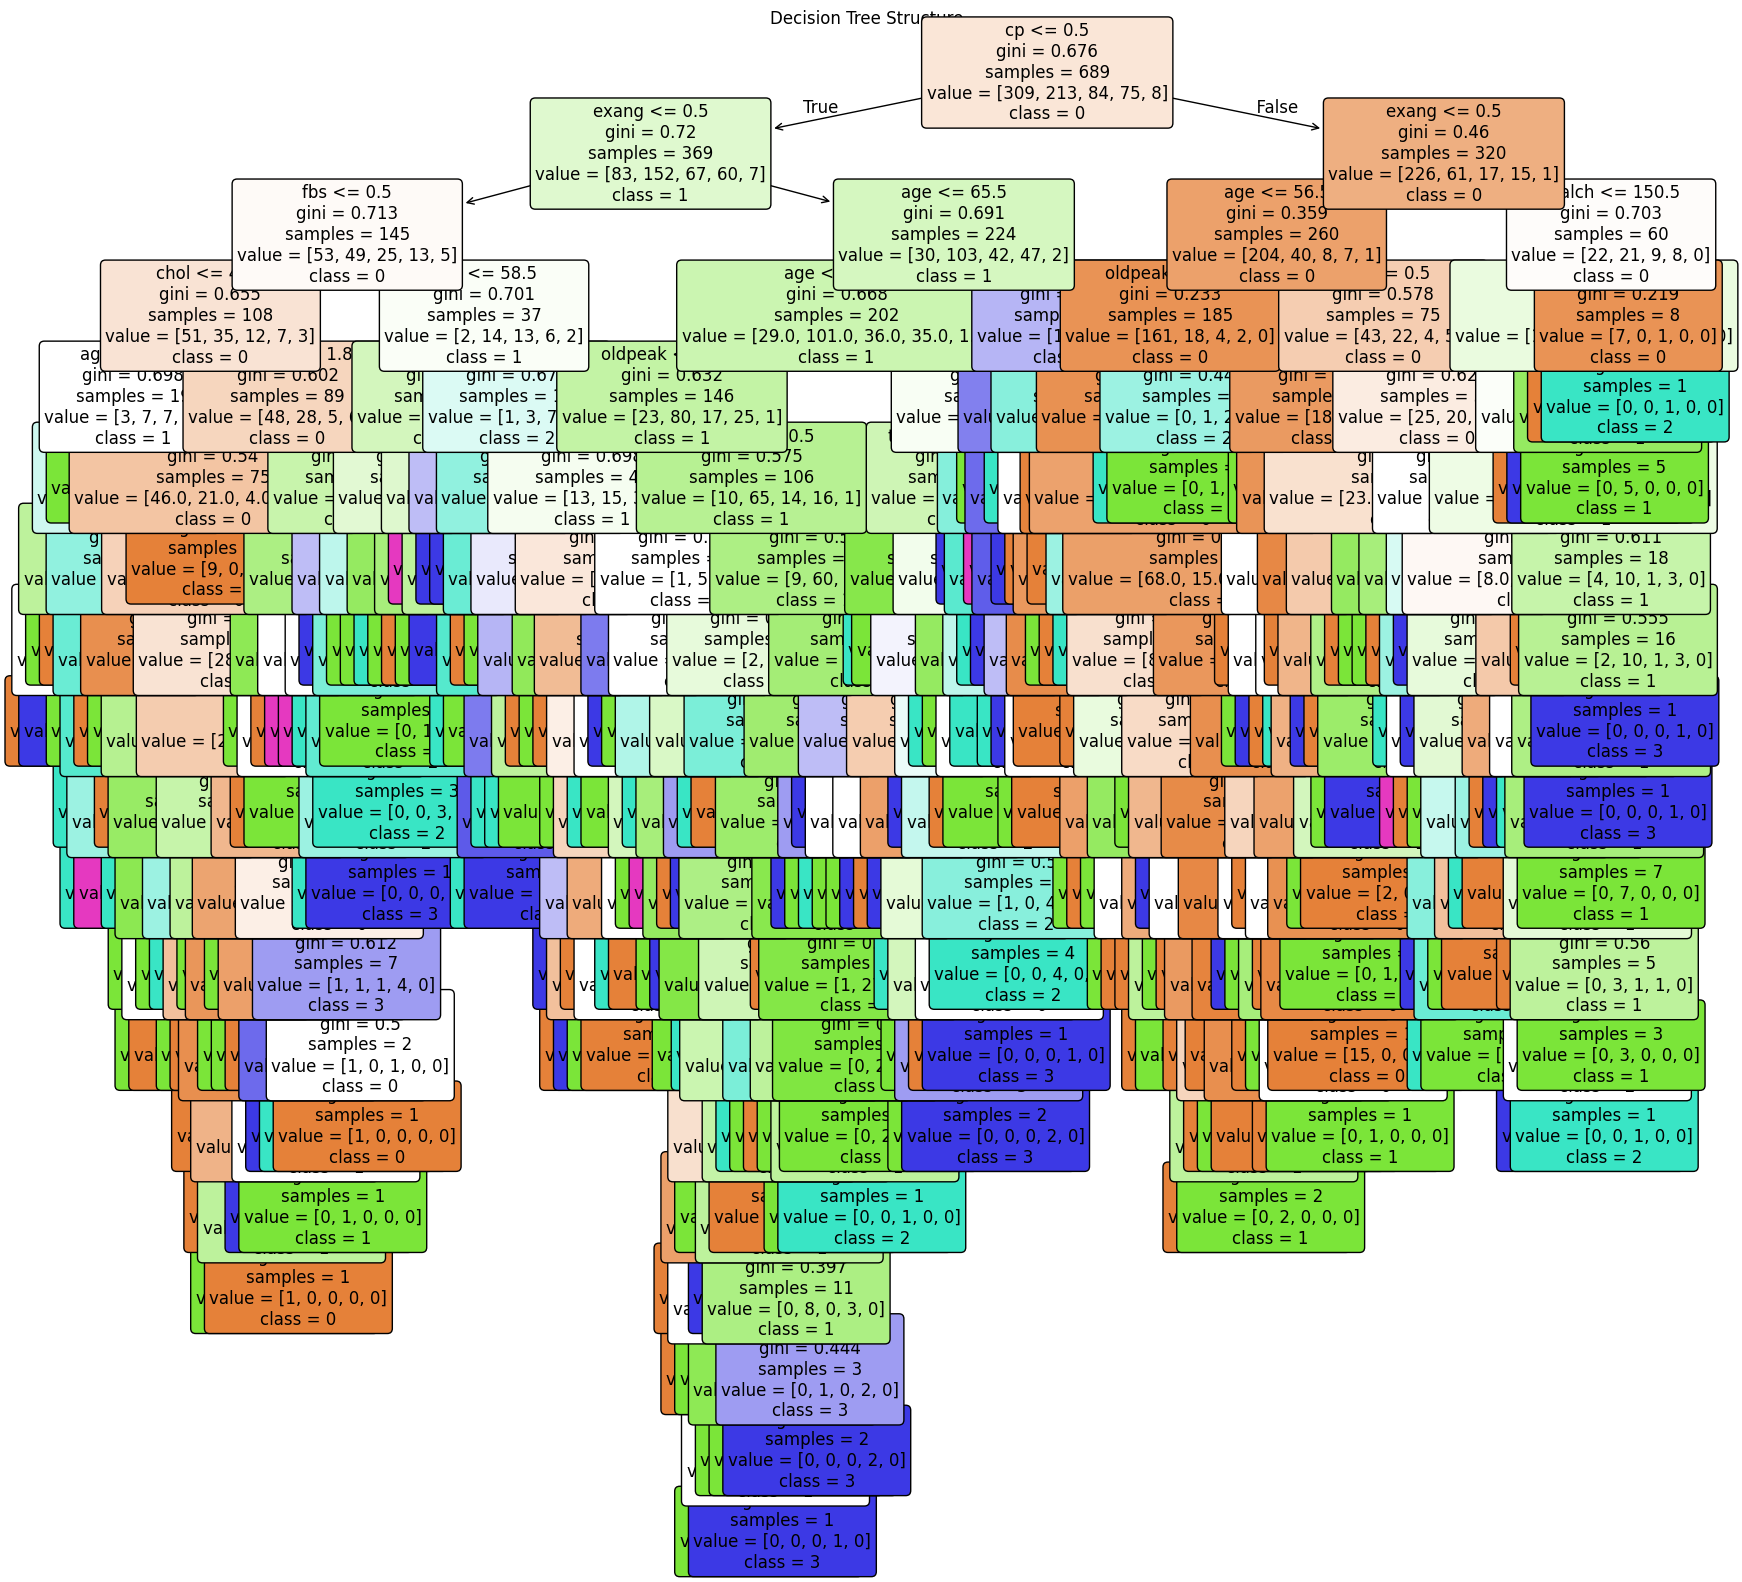

In [ ]:
from sklearn.tree import plot_tree

feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
class_names = [str(i) for i in range(len(model.classes_))]

# Plot the decision tree
plt.figure(figsize=(20, 20))
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=12)
plt.title("Decision Tree Structure")
plt.show()

#Interview Questions:

#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
1.max_depth: The maximum depth of the tree. This hyperparameter controls how deep the tree can grow.

Effect: A deeper tree can capture more complex patterns in the data but is also it has tendenct to fit the training data too closely.

2.min_samples_split: The minimum number of samples required to split an internal node.

Effect: Higher values prevent the model from learning overly specific patterns, reducing overfitting. Lower values can capture more detailed relationships but may overfit the training data.

3.criterion: The function to measure the quality of a split (e.g., "gini" for Gini impurity or "entropy" for information gain).

Effect: The choice of criterion can affect the splits and thus the overall structure of the tree. "Gini" is faster to compute, while "entropy" can provide more balanced splits.

4.max_samples: The number of samples to draw from the training data to train each base estimator (used in ensemble methods like Random Forests).

Effect: Controls the amount of data used for training each tree.

#2. What is the difference between the Label encoding and One-hot encoding?
These techniques are used to convert catagorical data into numerical format,which can be used by machine learning algorithms.

Label Encoding: this technique assigns unique numerical label to each category in catagorical column.
Ex: original data:['red','green','blue','orange']
    Encoded data: [0,1,2,3]

One-Hot Encoding: This technique converts each category into a new binary column (0 or 1) representing the presence of that category and each category in a feature is represented as a separate column.
